The objective of this project is to perform comprehensive analysis of the housing market in King county, Washington 
and to build predictive models to understand and forecast housing prices.
Moreover, I've tried to comprehend the impact of outliers by developing models both with and without their presence.

In [360]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

About the dataset

The dataset is from kaggle. This dataset contains house sale prices for King County,Seattle. 
It includes homes sold between May 2014 and May 2015.
Below is the description of the variables present.

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

In [361]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [363]:
#Identifying null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in the data. The only incosistency I see is with the datatype of column date. 
Changing the datatype from object to date format

In [364]:
df['date'] = pd.to_datetime(df['date'])

Data Analysis

In [365]:
#In predictive modelling our target variable is going to be 'price'.  Sorting the price column to understand the variabilty.

df.sort_values(by='price',ascending = False)[:20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


C:\Users\rgkam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


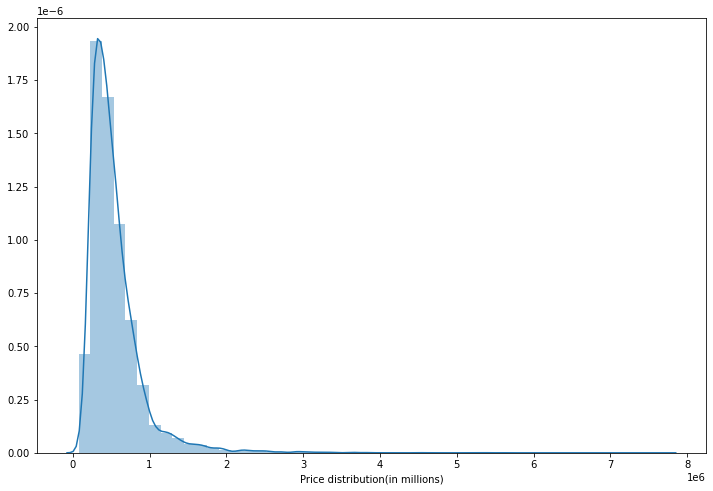

In [366]:
#Plot to understand the distribution of price

plt.figure(figsize=(12,8))
sns.distplot(df['price']) 
plt.xlabel('Price distribution(in millions)')
plt.ylabel('')
plt.show()


The distribution is skewed to the right,with almost all the houses are priced lesser than 1 million. At this point, I am not sure if it is a good idea to remove the outliers. Moving on with further analysis.

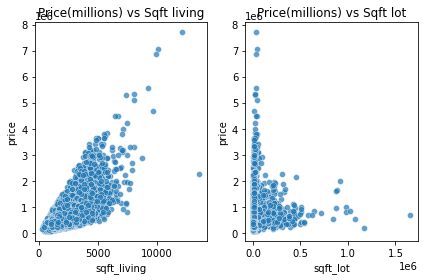

In [367]:
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.scatterplot(data=df, x='sqft_living', y='price', marker='o', alpha=0.7)
plt.title('Price(millions) vs Sqft living')
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.scatterplot(data=df, x='sqft_lot', y='price', marker='o', alpha=0.7)
plt.title('Price(millions) vs Sqft lot')

plt.tight_layout()
plt.show()

Sqft of living area has a higher correlation with the price than the sqft of the entire landscape

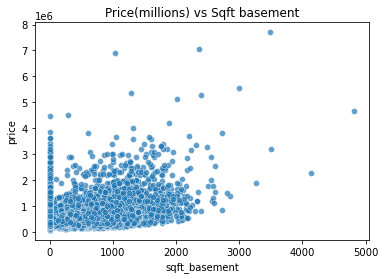

In [368]:
# sqft of interior living space below the ground level vs Price

sns.scatterplot(data=df, x='sqft_basement', y='price', marker='o', alpha=0.7)
plt.title('Price(millions) vs Sqft basement')
plt.show()


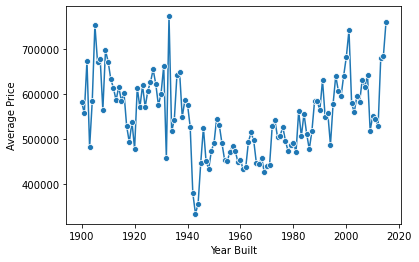

In [369]:
#average price per year

average_prices_by_year=df.groupby('yr_built')['price'].mean()
average_prices_by_year=average_prices_by_year.reset_index()
average_prices_by_year = average_prices_by_year.rename(columns={'yr_built': 'Year Built', 'price': 'Average Price'})
#average_prices_by_year
sns.lineplot(data=average_prices_by_year, x='Year Built', y='Average Price', marker='o')
plt.show()

The year of construction doesn't appear to have an impact on the house price. 
As part of feature engineering, we'll later transform the year built to calculate the house's age.

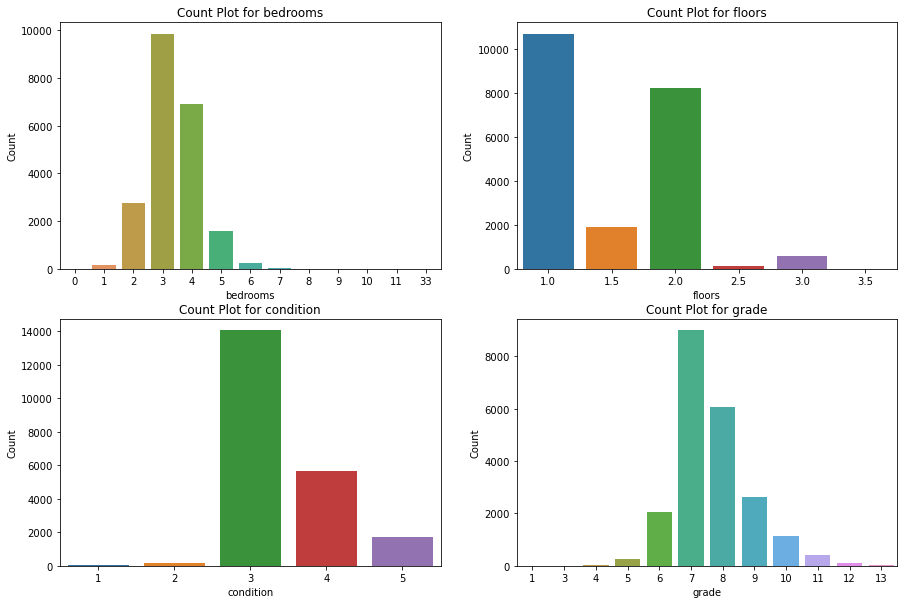

In [370]:
cat_columns = ['bedrooms','floors','condition','grade']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, cat_col in enumerate(cat_columns):
    sns.countplot(data=df, x=cat_col, ax=axes[i])
    axes[i].set_title(f'Count Plot for {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Count')
plt.show()

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design,
7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

Box plots to compare price vs condition,grade,no.of.floors,bedrooms and view

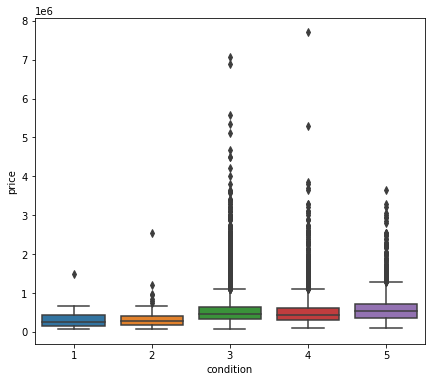

In [371]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=df, x='condition', y='price')
plt.show()

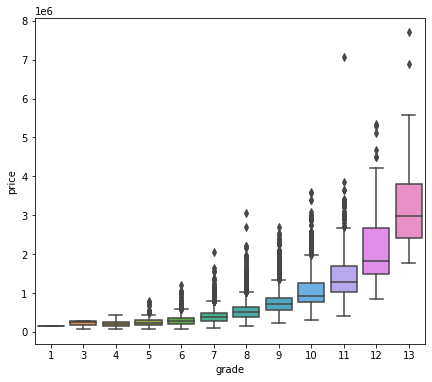

In [372]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=df, x='grade', y='price')
plt.show()

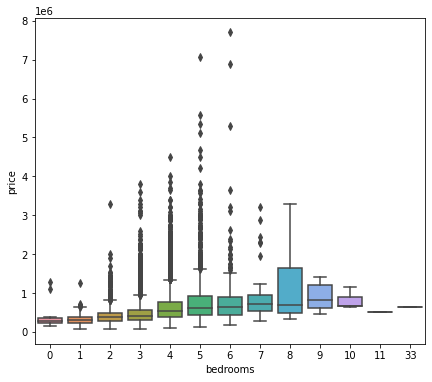

In [373]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.show()

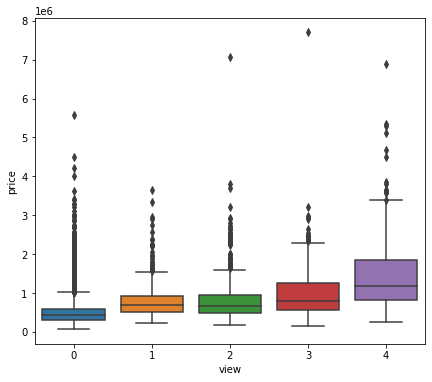

In [374]:
plt.figure(figsize=(7, 6))

sns.boxplot(data=df, x='view', y='price')
plt.show()

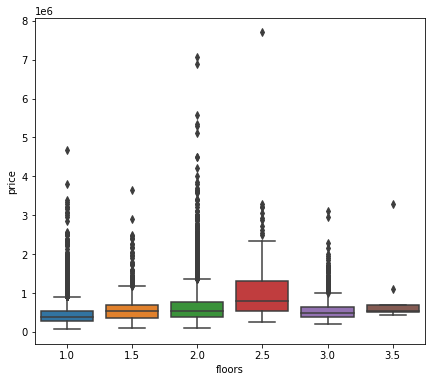

In [375]:
plt.figure(figsize=(7, 6))

sns.boxplot(data=df, x='floors', y='price')
plt.show()

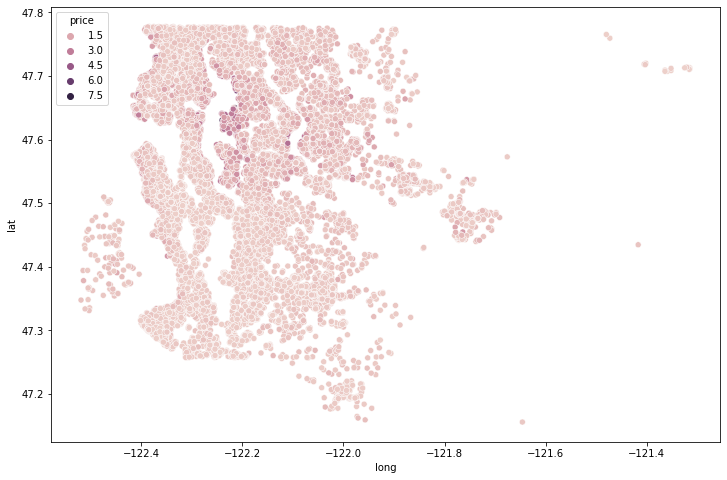

In [376]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')
plt.show()

Properties featuring a waterfront view command higher prices compared to those without such a view.

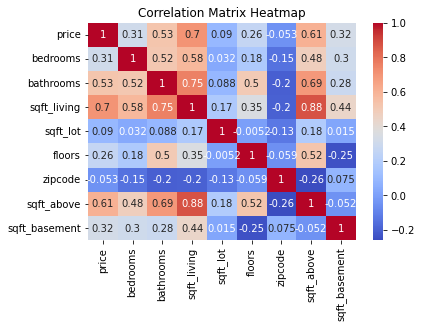

In [377]:
cols = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode','sqft_above','sqft_basement']
correlation_matrix = df[cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

Heatmap shows the square footage of the interior living space has higher correlation to price than other features

Feature engineering

1) More than half of the houses in the dataset do not have a basement, converting houses with and without basement to 0 and 1.

2) Doing the same binary conversion for 'year_renovated'.

3) Converting year_built to age of the house

In [378]:
df[df['sqft_basement']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [379]:
df['basement_present']=df['sqft_basement'].apply(lambda x: 1 if x>0 else 0)
df['is_renovated']=df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)


In [380]:
df['age']= 2023- df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_present,is_renovated,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0,0,68
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,1,72
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0,0,90
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,1,0,58
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0,0,36


In [381]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Drop unneccssary columns before building model

In [382]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'is_renovated', 'age'],
      dtype='object')

In [383]:
cols_to_drop = ['id','date','long','lat','yr_built','yr_renovated','zipcode','sqft_basement']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [384]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,basement_present,is_renovated,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1340,5650,0,0,68
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1690,7639,1,1,72
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,2720,8062,0,0,90
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1360,5000,1,0,58
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1800,7503,0,0,36


In [385]:
# df['zipcode'].unique()
# sorted_zipcodes = df.sort_values(by='price',ascending=False)

# print(sorted_zipcodes[:10])

In [386]:
# dummies = pd.get_dummies(df['condition'], prefix='condition')
# dummies_grade = pd.get_dummies(df['grade'], prefix='grade')
# df.drop('condition', axis=1, inplace=True)
# df.drop('grade', axis=1, inplace=True)

# # Concatenate the dummies with the original DataFrame
# df = pd.concat([df, dummies,dummies_grade], axis=1)

In [387]:
# dummies_zipcodes = pd.get_dummies(df['zipcode'])
# #dummies_zipcodes.reset_index(inplace=True)
# dummies_zipcodes = dummies_zipcodes.add_prefix("{}_".format('zipcode'))
# dummies_zipcodes = dummies_zipcodes[['zipcode_98077','zipcode_98109','zipcode_98166','zipcode_98115','zipcode_98004','zipcode_98116','zipcode_98112']]
# df = pd.concat([df, dummies,dummies_zipcodes], axis=1)


In [388]:
#df.drop('zipcode', axis=1, inplace=True)


In [389]:
#col = ['Category_1','Category_2','Category_3','Category_4','Category_5']
#df=df.drop(col,axis=1)
#df.head()

Predictive modelling without removing outliers

In [390]:
from sklearn.model_selection import train_test_split
X=df.drop('price',axis = 1)
y=df['price']


In [391]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10)


Linear Regression

In [392]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
lr_clf.score(X_test,y_test)

0.6554876790387265

In [393]:
y_pred = lr_clf.predict(X_test)

In [394]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.64537478, 0.63582877, 0.6407632 , 0.64178415, 0.66901226])

In [395]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import ElasticNet

#model = ElasticNet(max_iter=10000) 
#model = ElasticNet(alpha=0.1, l1_ratio=0.5) 
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.646553,{'normalize': False}
1,lasso,0.646556,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.523938,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [396]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R²)
r2_lrclf = r2_score(y_test, y_pred)
print("R-squared:", r2_lrclf)

Mean Squared Error: 50331310159.4988
Root Mean Squared Error: 224346.40661151407
Mean Absolute Error: 139531.44064531638
R-squared: 0.6554876790387265


Random Forest Regressor

In [397]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [398]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R²)
r2_reg = r2_score(y_test, y_pred)
print("R-squared:", r2_reg)

Mean Squared Error: 32844486094.217457
Root Mean Squared Error: 181230.47782924774
Mean Absolute Error: 112698.90104409966
R-squared: 0.7751830798912029


XGBoost

In [399]:
import xgboost as xgb
regressor = xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, learning_rate=0.1, n_estimators=100)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [400]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R²)
r2_regressor = r2_score(y_test, y_pred)
print("R-squared:", r2_regressor)

Mean Squared Error: 36089738754.49771
Root Mean Squared Error: 189972.99480320278
Mean Absolute Error: 121019.35375101202
R-squared: 0.7529696798712971


In [401]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_living15', 'sqft_lot15', 'basement_present', 'is_renovated',
       'age'],
      dtype='object')

Estimating the house price by providing inputs that are similar to an entry from the training dataset. 

The prediction though not accurate, is fairly similar to the price of the input.

In [453]:
X_input=np.array([5,5,6600,40000,2.0,1,4,3,12,6350,3000,23400,1,0,19])
X_input_reshaped = X_input.reshape(1, -1)
predicted_price = regressor.predict(X_input_reshaped)
print("Predicted Price:", predicted_price)

Predicted Price: [3919819.8]


In [403]:
#sample input from training dataset

df[df['price']==4500000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,basement_present,is_renovated,age
2626,4500000.0,5,5.5,6640,40014,2.0,1,4,3,12,6350,3030,23408,1,0,19


Out of all the 3 predictive models, Random Forest has a better accuracy than XG Boost and Linear Regression

In [404]:
models = pd.DataFrame({'Model':['Linear Regression','Random Forest','XG Boost'],
                      'R-squared score':[r2_lrclf*100,r2_reg*100,r2_regressor*100]})
models.sort_values(by='R-squared score',ascending = False)

,Model,R-squared score
1,Random Forest,77.518308
2,XG Boost,75.296968
0,Linear Regression,65.548768


Predictive modelling after removing outliers - removing outliers that falls outside 3 SD of the mean using Z-score

In [405]:
df_outlier =df[(np.abs(stats.zscore(df.price))<3.0)]

In [406]:
df_outlier.shape

(21207, 16)

C:\Users\rgkam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


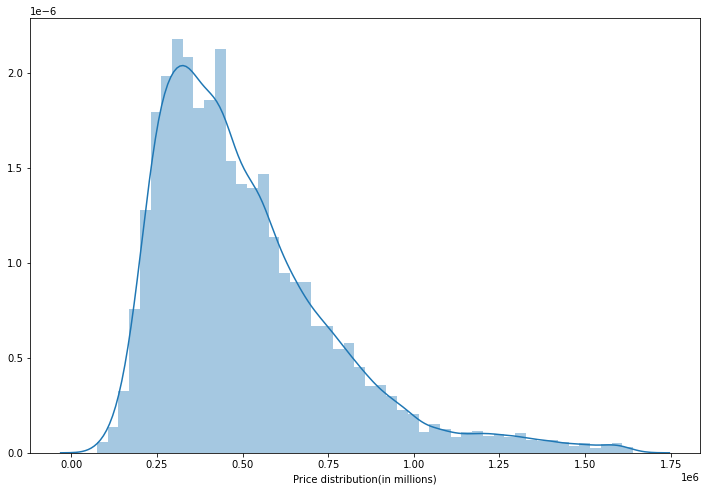

In [407]:
plt.figure(figsize=(12,8))

sns.distplot(df_outlier['price']) 
plt.xlabel('Price distribution(in millions)')
plt.ylabel('')
plt.show()


The price distribution after removing outliers is more normally distributed 

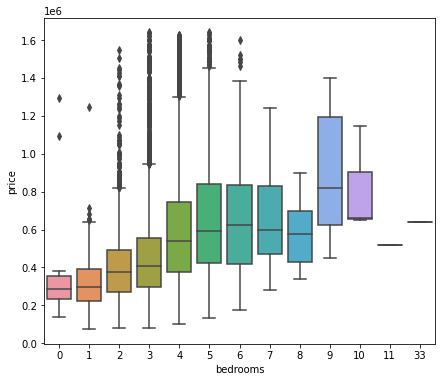

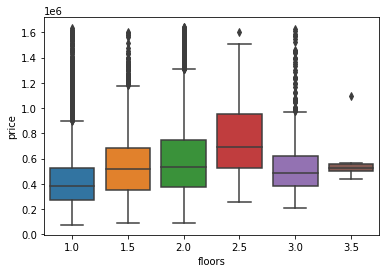

In [408]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=df_outlier, x='bedrooms', y='price')
plt.show()
sns.boxplot(data=df_outlier, x='floors', y='price')
plt.show()

In [409]:
df_outlier.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_living15', 'sqft_lot15', 'basement_present', 'is_renovated',
       'age'],
      dtype='object')

In [410]:
X_outlier=df_outlier.drop('price',axis = 1)
y_outlier=df_outlier['price']


Linear Regression

In [411]:
Xo_train,Xo_test,yo_train,yo_test=train_test_split(X_outlier,y_outlier,train_size=0.8,random_state=10)
from sklearn.linear_model import LinearRegression
lro_clf = LinearRegression()
lro_clf.fit(Xo_train,yo_train)
yo_pred = lro_clf.predict(Xo_test)
lro_clf.score(Xo_test,yo_test)


0.6182821380209356

In [412]:
yo_pred = lro_clf.predict(Xo_test)

In [413]:
mse = mean_squared_error(yo_test, yo_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(yo_test, yo_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R²)
r2_lroclf = r2_score(yo_test, yo_pred)
print("R-squared:", r2_lroclf)

Mean Squared Error: 25748103678.698086
Root Mean Squared Error: 160462.15653137062
Mean Absolute Error: 118276.43007597634
R-squared: 0.6182821380209356


Random Forest Regressor

In [422]:
from sklearn.ensemble import RandomForestRegressor

reg_outlier = RandomForestRegressor(n_estimators=100, random_state=42)
reg_outlier.fit(Xo_train,yo_train)
yo_pred=reg_outlier.predict(Xo_test)

In [423]:
mse = mean_squared_error(yo_test, yo_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(yo_test, yo_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R²)
r2_reg_outlier = r2_score(yo_test, yo_pred)
print("R-squared:", r2_reg_outlier)

Mean Squared Error: 20548328301.91155
Root Mean Squared Error: 143346.88103307845
Mean Absolute Error: 103467.51817163026
R-squared: 0.6953692573042265


XGBoost

In [424]:
import xgboost as xgb
regressor_outlier = xgb.XGBRegressor(objective='reg:squarederror', max_depth=3, learning_rate=0.1, n_estimators=100)
regressor_outlier.fit(Xo_train,yo_train)
yo_pred=regressor_outlier.predict(Xo_test)

In [425]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(yo_test, yo_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(yo_test, yo_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R²)
r2_regressor_outlier = r2_score(yo_test, yo_pred)
print("R-squared:", r2_regressor_outlier)

Mean Squared Error: 22000933119.671238
Root Mean Squared Error: 148327.1152543298
Mean Absolute Error: 109646.91168670438
R-squared: 0.6738342653586079


In [429]:
X_input=np.array([5,5.5,6640,40014,2.0,1,4,3,12,6350,3030,23408,1,0,19])
X_input_reshaped = X_input.reshape(1, -1)
predicted_price = reg_outlier.predict(X_input_reshaped)
print("Predicted Price:", predicted_price)

Predicted Price: [1246177.5]


In [430]:
models_o = pd.DataFrame({'Model':['Linear Regression','Random Forest','XG Boost'],
                      'R-squared score':[r2_lroclf*100,r2_reg_outlier*100,r2_regressor_outlier*100]})
models_o.sort_values(by='R-squared score',ascending = False)

,Model,R-squared score
1,Random Forest,69.536926
2,XG Boost,67.383427
0,Linear Regression,61.828214


After removing outliers, the accuracy of all three models has decreased. However, Random Forest continues to outperform the other two models. The predicted house prices using this technique deviate significantly from their expected values. It appears that, in this project outliers contains some important information and thus it is prudent to condut modeling while retaining the outliers.

Inference - It is important to consider these factors and evaluate the trade-offs between outlier removal and model performance. Sometimes, removing outliers is appropriate if they are genuine errors or anomalies. However, in cases where outliers represent important or meaningful data points, their removal might lead to a loss of insights and decrease in model accuracy.